In [63]:
import numpy as np
import os
from datetime import datetime
from subprocess import call
import matplotlib.pyplot as plt
%matplotlib inline

## Load UCI Diabetes data set

In [44]:
datadir = 'Diabetes-Data/'
dd = list(os.walk(datadir))
if not dd: #Download and unpack data if it doesn't exist
    call(['../dldata'])
    dd = list(os.walk(datadir))
datafilenames = [os.path.join(datadir, fp) for fp in dd[0][2] if 'data' in fp]

In [47]:
codesfilename = os.path.join(datadir, 'Data-Codes')

In [49]:
with open(codesfilename, 'r') as infile:
    for l in infile:
        print l

Diabetes patient records were obtained from two sources:  an automatic

electronic recording device and paper records.  The automatic device

had an internal clock to timestamp events, whereas the paper records

only provided "logical time" slots (breakfast, lunch, dinner,

bedtime).  For paper records, fixed times were assigned to breakfast

(08:00), lunch (12:00), dinner (18:00), and bedtime (22:00).  Thus

paper records have fictitious uniform recording times whereas

electronic records have more realistic time stamps.



Diabetes files consist of four fields per record.  Each field is

separated by a tab and each record is separated by a newline.



File Names and format:

(1) Date in MM-DD-YYYY format

(2) Time in XX:YY format

(3) Code

(4) Value



The Code field is deciphered as follows:



33 = Regular insulin dose

34 = NPH insulin dose

35 = UltraLente insulin dose

48 = Unspecified blood glucose measurement

57 = Unspecified blood glucose measurement

58 = Pre-breakfast blo

In [104]:
glucose_measurements = [48, 57, 58, 59, 60, 61, 62, 63, 64]

## Function for loading data

In [155]:
convstrlist = lambda s: datetime.strptime(s[0]+' '+s[1], '%m-%d-%Y %H:%M')
convdata = lambda l: [convstrlist(l), int(l[2]), int(l[3])]

def load_ddata(filename):
    datalist = []
    with open(filename, 'r') as infile:
        for l in infile:
            if not 'Hi' in l and not 'Lo' in l and '.'  not in l: #Throw away '0Hi'/'0Lo' values for now
                datalist += [convdata(l.split())]
    return datalist

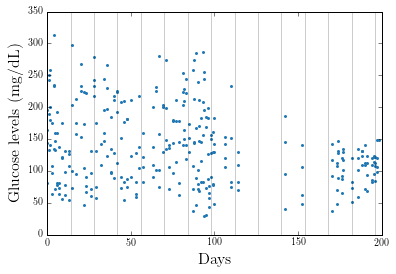

In [193]:
datalist = load_ddata(datafilenames[40])
measurements = np.array([d for d in datalist if d[1] in glucose_measurements])
days = np.array(map(lambda dt: dt.days, measurements[:,0] - measurements[0,0]))
plt.plot(days, measurements[:,2], '.')
plt.ylabel('Glucose levels (mg/dL)', fontsize=16)
plt.xlabel('Days', fontsize=16)
for w in np.arange(0, days.max(), 2*7):
    plt.axvline(w, c='k', lw = 1, alpha = 0.2)